In [ ]:
# TODO: get scene from Innopolis

In [1]:
import numpy as np

In [2]:
cache_dir = '../../dataset/metadata_cache/rip-bc-k_3-plan_bcm-scene_bcm/'

req_path = f'{cache_dir}moscow__development__request_ids.npy'
gt_path = f'{cache_dir}moscow__development__gt_trajectories.npy'
score_path = f'{cache_dir}moscow__development__plan_conf_scores.npy'
pred_path = f'{cache_dir}moscow__development__predictions.npy'

requests = np.load(req_path)
gts = np.load(gt_path)
scores = np.load(score_path)
predictions = np.load(pred_path)

In [3]:
requests.shape, gts.shape, scores.shape, predictions.shape

((136,), (136, 25, 2), (136, 30, 3), (136, 30, 25, 2))

In [4]:
# find index with non-zero gt trajectory

non_zero_indexes = []

for idx, gt in enumerate(gts):
    if gt[-1, 1] > 2.0: # or gt[-1, 0] > 2.0:
        non_zero_indexes.append(idx)

In [5]:
idx = non_zero_indexes[3]

pred_request = requests[idx]
pred_request

3113

In [6]:
gt = gts[idx]
score = scores[idx]
prediction = predictions[idx]

gt.shape, score.shape, prediction.shape

((25, 2), (30, 3), (30, 25, 2))

In [7]:
import pandas as pd

request_path = f'{cache_dir}request.tsv'
scene_path = f'{cache_dir}scene.tsv'

request_df = pd.read_csv(request_path, sep='\t')
scene_df = pd.read_csv(scene_path, sep='\t')

In [8]:
dev_request_df = request_df.loc[request_df['dataset_key'] == 'moscow__development']
dev_scene_df = scene_df.loc[scene_df['dataset_key'] == 'moscow__development']

In [9]:
dev_request_df

,request_ids,kMoveLeft,kMoveRight,kMoveForward,kMoveBack,kAcceleration,kDeceleration,kUniform,kStopping,kStarting,kStationary,scene_ids,dataset_key,run_datetime
50,224,False,False,False,False,False,False,True,False,False,False,190800d0f6100511c0321f38b9581850,moscow__development,2023-02-09 21:53:11.418363
51,225,False,False,False,False,True,False,True,False,False,True,190800d0f6100511c0321f38b9581850,moscow__development,2023-02-09 21:53:11.418363
52,227,False,False,False,False,True,False,True,False,False,False,190800d0f6100511c0321f38b9581850,moscow__development,2023-02-09 21:53:11.418363
53,234,False,False,False,False,False,False,True,False,False,False,190800d0f6100511c0321f38b9581850,moscow__development,2023-02-09 21:53:11.418363
54,240,False,False,False,False,False,False,True,True,False,False,190800d0f6100511c0321f38b9581850,moscow__development,2023-02-09 21:53:11.418363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,3111,False,False,False,False,False,False,True,False,False,True,8b432f19859640ce35925632a0f0a470,moscow__development,2023-02-09 21:53:11.418363
182,3113,False,False,True,False,True,False,False,False,False,False,8b432f19859640ce35925632a0f0a470,moscow__development,2023-02-09 21:53:11.418363
183,3114,False,False,False,False,False,False,True,False,False,True,8b432f19859640ce35925632a0f0a470,moscow__development,2023-02-09 21:53:11.418363
184,3116,False,False,True,False,True,False,True,False,False,False,8b432f19859640ce35925632a0f0a470,moscow__development,2023-02-09 21:53:11.418363


In [10]:
dev_scene_df

,num_vehicles,day_time__kNight,day_time__kMorning,day_time__kAfternoon,day_time__kEvening,season__kWinter,season__kSpring,season__kSummer,season__kAutumn,track__Moscow,...,sun_phase__kAstronomicalNight,sun_phase__kTwilight,sun_phase__kDaylight,precipitation__kNoPrecipitation,precipitation__kRain,precipitation__kSleet,precipitation__kSnow,scene_ids,dataset_key,run_datetime
10,8,0,1,0,0,0,0,1,0,1,...,0,0,1,1,0,0,0,019b14d167d7e555cbffc8a4f69be5e9,moscow__development,2023-02-09 21:53:11.422409
11,15,1,0,0,0,0,0,1,0,1,...,1,0,0,1,0,0,0,190800d0f6100511c0321f38b9581850,moscow__development,2023-02-09 21:53:11.422409
12,1,1,0,0,0,0,0,1,0,1,...,0,1,0,1,0,0,0,2a1052a5c3a20f40df76ca776d466960,moscow__development,2023-02-09 21:53:11.422409
13,18,0,1,0,0,0,0,1,0,1,...,0,0,1,1,0,0,0,5b83d43da60c3215b95d154128c3c39e,moscow__development,2023-02-09 21:53:11.422409
14,14,0,1,0,0,0,0,1,0,1,...,0,0,1,1,0,0,0,5ccdd0e91ff02abbb7cf2eea2623a380,moscow__development,2023-02-09 21:53:11.422409
15,15,1,0,0,0,0,0,1,0,1,...,0,0,1,1,0,0,0,8793fd249c9baded6b521f257095293e,moscow__development,2023-02-09 21:53:11.422409
16,21,0,1,0,0,0,0,1,0,1,...,0,0,1,1,0,0,0,8b432f19859640ce35925632a0f0a470,moscow__development,2023-02-09 21:53:11.422409
17,23,0,1,0,0,0,0,1,0,1,...,0,0,1,1,0,0,0,8ec80dfdbf2416dfe64a16f81ef43445,moscow__development,2023-02-09 21:53:11.422409
18,14,0,1,0,0,0,0,1,0,1,...,0,0,1,1,0,0,0,909951d9d9250333747354b5b1005a80,moscow__development,2023-02-09 21:53:11.422409
19,11,0,1,0,0,0,0,1,0,1,...,0,0,1,1,0,0,0,d99d0bcd3ab969a3fc7e5d0d19733ffd,moscow__development,2023-02-09 21:53:11.422409


In [11]:
request_per_scene = dev_request_df.loc[dev_request_df['request_ids'] == pred_request]

request_per_scene

,request_ids,kMoveLeft,kMoveRight,kMoveForward,kMoveBack,kAcceleration,kDeceleration,kUniform,kStopping,kStarting,kStationary,scene_ids,dataset_key,run_datetime
182,3113,False,False,True,False,True,False,False,False,False,False,8b432f19859640ce35925632a0f0a470,moscow__development,2023-02-09 21:53:11.418363


In [12]:
scene_id = request_per_scene.iloc[0]['scene_ids']
scene_id

'8b432f19859640ce35925632a0f0a470'

In [13]:
scene_info = dev_scene_df.loc[dev_scene_df['scene_ids'] == scene_id]
scene_info 

,num_vehicles,day_time__kNight,day_time__kMorning,day_time__kAfternoon,day_time__kEvening,season__kWinter,season__kSpring,season__kSummer,season__kAutumn,track__Moscow,...,sun_phase__kAstronomicalNight,sun_phase__kTwilight,sun_phase__kDaylight,precipitation__kNoPrecipitation,precipitation__kRain,precipitation__kSleet,precipitation__kSnow,scene_ids,dataset_key,run_datetime
16,21,0,1,0,0,0,0,1,0,1,...,0,0,1,1,0,0,0,8b432f19859640ce35925632a0f0a470,moscow__development,2023-02-09 21:53:11.422409


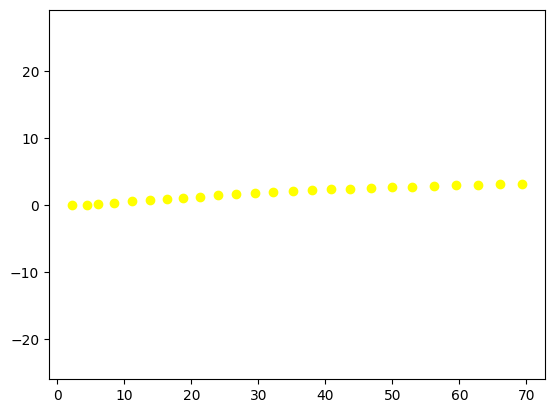

In [14]:
import matplotlib.pyplot as plt

plt.scatter(gt[:, 0], gt[:, 1], c='yellow')
plt.axis('equal')
plt.show()

### Draw input for certain request_id

In [29]:
from ysdc_dataset_api.dataset.utils import read_feature_map_from_file
from ysdc_dataset_api.utils import transform_2d_points
from ysdc_dataset_api.features import FeatureRenderer
from ysdc_dataset_api.dataset import MotionPredictionDataset

import yaml
from matplotlib import collections as mc

In [30]:
import glob

features_folder = '../../dataset/development_rendered/'
search_path = f'{features_folder}**/{scene_id}_{pred_request}.npy'

full_path = glob.glob(search_path)[0]
print(full_path)

feature = read_feature_map_from_file(full_path)
feature.shape

../../dataset/development_rendered/000/8b432f19859640ce35925632a0f0a470_3113.npy


(17, 128, 128)

In [31]:
with open('prerendered_images_config.yaml') as f:
    renderer_config = yaml.safe_load(f)

In [32]:
renderer = FeatureRenderer(renderer_config)

In [33]:
transformed_gt = transform_2d_points(gt, renderer.to_feature_map_tf)
transformed_gt = np.round(transformed_gt - 0.5).astype(np.int32)

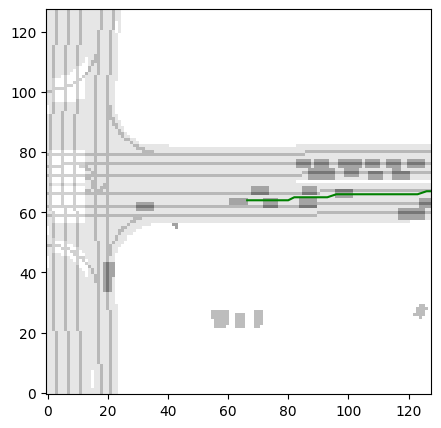

In [34]:
plt.figure(figsize=(5, 5))
plt.imshow(feature[0], origin='lower', cmap='binary', alpha=0.7)
plt.imshow(feature[6], origin='lower', cmap='binary', alpha=0.5)
plt.imshow(feature[13], origin='lower', cmap='binary', alpha=0.2)
plt.imshow(feature[16], origin='lower', cmap='binary', alpha=0.1)

ax = plt.gca()
ax.add_collection(mc.LineCollection([transformed_gt], color='green'))

plt.show()

Resolution is so low, redraw

### Draw input feature from shource

In [49]:
with open('renderer_config.yaml') as f:
    renderer_config = yaml.safe_load(f)

renderer = FeatureRenderer(renderer_config)

In [50]:
dataset_path = '../../dataset/development_pb/'

dataset = MotionPredictionDataset(
    dataset_path=dataset_path,
    feature_producers=[renderer],
    transform_ground_truth_to_agent_frame=True)

In [51]:
print(f'Количество сцен в датасете: {dataset.num_scenes}')

Количество сцен в датасете: 36605


In [52]:
dataset_iter = iter(dataset)

while True:
    data_item = next(dataset_iter)
    
    if data_item['scene_id'] == scene_id and data_item['track_id'] == pred_request:
        target_data_item = data_item
        break

In [53]:
# target_data_item

In [54]:
target_data_item['feature_maps'].shape

(17, 500, 500)

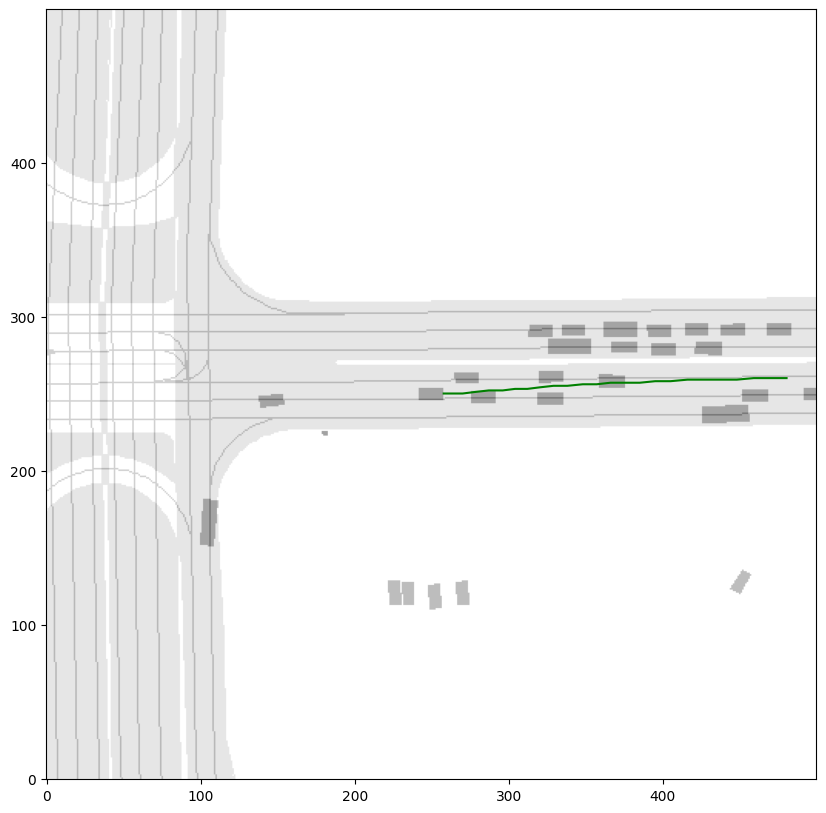

In [55]:
plt.figure(figsize=(10, 10))
plt.imshow(target_data_item['feature_maps'][0], origin='lower', cmap='binary', alpha=0.7)
plt.imshow(target_data_item['feature_maps'][6], origin='lower', cmap='binary', alpha=0.5)
plt.imshow(target_data_item['feature_maps'][13], origin='lower', cmap='binary', alpha=0.2)
plt.imshow(target_data_item['feature_maps'][16], origin='lower', cmap='binary', alpha=0.1)

# Переведем ground truth траекторию агента в систему координат фичемапы
transformed_gt = transform_2d_points(target_data_item['ground_truth_trajectory'], renderer.to_feature_map_tf)
transformed_gt = np.round(transformed_gt - 0.5).astype(np.int32)

ax = plt.gca()
ax.add_collection(mc.LineCollection([transformed_gt], color='green'))

plt.show()